## Hash Table

### 1. Hash 구조
* Hash Table : 데이터가 key와 value로 한 쌍을 이루며, key가 데이터의 저장 및 탐색의 도구가 된다.(키(key)에 데이터(Value)를 저장하는 데이터 구조)
    * Key를 통해 원하는 데이터를 한번에 찾을 수 있기에 속도가 매우 빠르다.(O(1)의 시간 복잡도)
    * 보통 배열로 미리 Hash Table 사이즈만큼 생성 후에 사용(공간과 탐색 시간을 맞바꾸는 기법)
    * Hash Table의 예 : python의 딕셔너리 자료구조, 블록체인, AES 등
    
* Hash Table 용어:
    * 해시(Hash) : input 값을 특정 고정 길이로 변환
    * 해시 테이블(Hash Table) : 키 값의 연산에 의해 직접 전근이 가능한 데이터 구조(사전 구조 또는 맵(map)이라고 불린다.)
    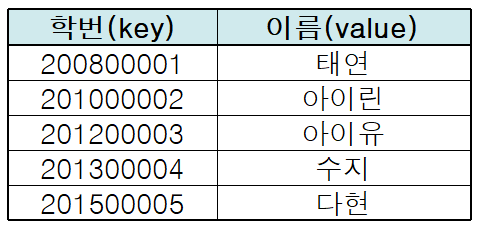
    * 해싱 함수(Hashing Function) : key에 대해 산술 연산을 이용해 데이터 위치를 찾을 수 있는 함수
    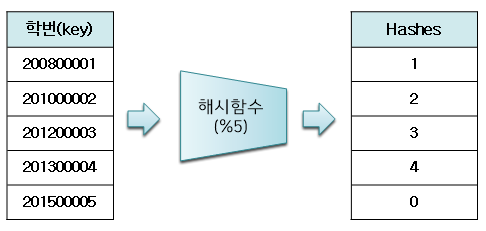
    * 해시 값(Hash Value = Hash address) : Key를 해싱함수로 input으로해 나온 output 값으로, 이를 통해 해시 테이블에서 해당 Key에 대한 데이터의 위치를 일관성있게 찾을 수 있게됨
    * 슬롯(Slot) : 한개의 데이터를 저장할 수 있는 공간
    


### 2. Hash Table의 장단점과 사용용도
* 장점
    - 데이터 저장/읽기 속도가 빠르다.(검색 속도가 빠름)
    - 해시는 키에 대한 데이터가 있는지 확인이 쉬움
* 단점
    * 일반적으로 저장공간이 좀더 많이 필요
    * **여러 키에 해당하는 주소가 동일할 경우 충돌을 해결하기 위한 별도 자료구조가 필요**
* 사용 용도
    * 검색이 많이 필요할 경우
    * 저장, 삭제, 읽기가 빈번할 경우
    * 캐시 구현시(중복 확인이 쉽기 때문)

### 3. Hash Table 예제1
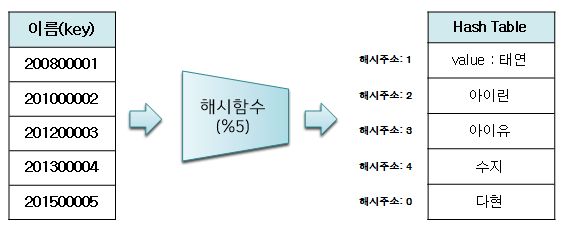

In [12]:
#### 2.1 Hash Table 만들기
hash_table = list([0 for i in range(5)])

# 나머지 연산을 통한 Hash Function 구현
def hash_func(key):
    return key % 5

# Key value 입력을 통한 Hash Table 내 값을 저장
def set_data(key, value):
    hash_address = hash_func(key)
    hash_table[hash_address] = value
    
# key에 따른 데이터 읽기
def get_data(key):
    hash_address = hash_func(key)
    return hash_table[hash_address]

set_data(200800001, "태연")
set_data(201000002, "아이린")
set_data(201200003, "아이유")
set_data(201300004, "수지")
set_data(201500005, "다현")

print(get_data(200100002))
print(get_data(201300004))
print(hash_table)

아이린
수지
['다현', '태연', '아이린', '아이유', '수지']


### 4. Hash Table 예제 2
* 클래스로 구현 및 문자 데이터의 숫자변환을 위한 내장 hash함수 사용
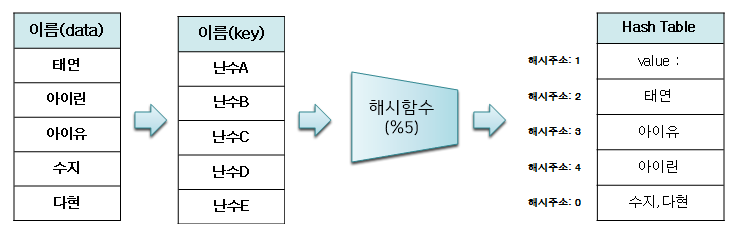
    * 랜덤하게 genetate되는 hash()로 인해 Hash Table에 어떻게 저장될지는 알 수 없다.
    * 수지와 다현은 hash_address가 같아져서 Collision 현상이 발생한다. 여기서는 Collision에 대한 조치를 취하지 않았기 때문에 먼저 할당된 수지 값은 다현에 덮어져서 원하는 결과가 나오지 않게된다.

In [35]:
class HashTable:        
    def __init__(self):
        self.hash_table = list([0 for i in range(5)])
        
    def hash_func(self, key):
        return key % 5
    
    # 추가된 부분 파이썬 내장 hash 함수 이용하여 암호화, 파이썬 3버전에서는 key는 고정이 아닌 매 실행마다 랜덤 generate 된다.
    def get_key(self, key):
        randomized_key = hash(key)
        return randomized_key
    
    def set_data(self, data, value):
        hash_address = self.hash_func(self.get_key(data))
        self.hash_table[hash_address] = value
        
    def get_data(self, key):
        hash_address = self.hash_func(self.get_key(key))
        return self.hash_table[hash_address]
    
my_friends = HashTable()
my_friends.set_data("태연", "89.03.09")
my_friends.set_data("아이린", "91.03.29")
my_friends.set_data("아이유", "93.05.16")
my_friends.set_data("수지", "94.10.10")
my_friends.set_data("다현", "98.05.28")

# 한글에대한 key 변경으로 인해 특정 item은 같은 key가 나와 collision이 발생해 데이터 유실이 가능하다.
print(my_friends.get_data("아이린"))
print(my_friends.get_data("수지"))
print(my_friends.hash_table)

print(my_friends.get_key("아이린"))

91.03.29
98.05.28
[0, '89.03.09', '93.05.16', '91.03.29', '98.05.28']
-6798298344436456467


### 5. Collision(충돌)을 해결하는 기법
* Chaining 기법 :
    * 개방 해싱(open hashing) 기법 중 하나로 해시 테이블 저장공간 외의 공간을 활용
    * 충돌이 일어나면 linked list 자료구조를 사용해 데이터를 추가적으로 연결 저장
* Linear Probing 기법 :
    * 폐쇄 해싱(close hashing) 기법 중 하나로 해시 테이블 저장공간 안에서 충돌 문제를 해결하는 기법
    * 충돌이 일어나면 hash address의 다음 address부터 맽 처음 나오는 빈공간에 저장하는 기법
    * 저장공간 활용도를 높이는 방법

### 5-1 Chaning 기법을 통한 Collision solution 구현
* python의 list를 append를 사용(linked list 작성의 복잡함으로 대체)
* 앞에까지는 key에 대해 value만 저장하였으나, key에 [key, value] 형태 저장으로 같은 hash_address에서 원하는 value를 찾음
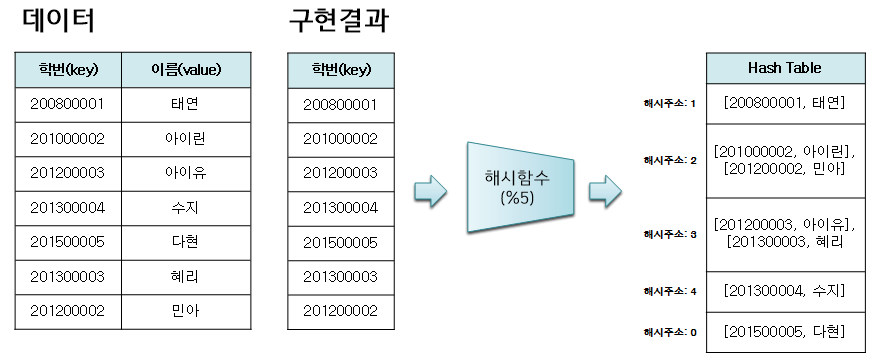

In [39]:
class HashTable:        
    def __init__(self):
        self.hash_table = list([None for i in range(5)])
        
    def hash_func(self, key):
        return key % 5
    
    def get_key(self, key):
        randomized_key = hash(key)
        return randomized_key
    
    def set_data(self, data, value):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if self.hash_table[hash_address] != None:
            self.hash_table[hash_address].append([key, value])
        else:
            self.hash_table[hash_address] = [[key, value]]
        
    def get_data(self, data):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if len(self.hash_table[hash_address]) != 1:
            for i in range(len(self.hash_table[hash_address])):
                if self.hash_table[hash_address][i][0] == key:
                    return self.hash_table[hash_address][i]
        return self.hash_table[hash_address]

my_friends = HashTable()
my_friends.set_data(200800001, "태연")
print()
my_friends.set_data(201000002, "아이린")
my_friends.set_data(201200003, "아이유")
my_friends.set_data(201300004, "수지")
my_friends.set_data(201500005, "다현")
my_friends.set_data(201300003, "혜리")
my_friends.set_data(201200002, "민아")

# 한글에대한 key 변경으로 인해 특정 item은 같은 key가 나와 collision이 발생해 데이터 유실이 가능하다.
print(my_friends.get_data(200800001))
print(my_friends.get_data(201200002))
print(my_friends.get_data(201500005))
print(my_friends.hash_table)

print(my_friends.get_key("아이린"))


[[200800001, '태연']]
[201200002, '민아']
[[201500005, '다현']]
[[[201500005, '다현']], [[200800001, '태연']], [[201000002, '아이린'], [201200002, '민아']], [[201200003, '아이유'], [201300003, '혜리']], [[201300004, '수지']]]
6650112356420172991


### 5-1 Chaning 기법을 통한 Collision solution 구현

In [38]:
class HashTable:        
    def __init__(self):
        self.hash_table = list([None for i in range(10)])
        
    def hash_func(self, key):
        return key % 10
    
    def get_key(self, key):
        randomized_key = hash(key)
        return randomized_key
    
    def set_data(self, data, value):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if self.hash_table[hash_address] != None:
            for i in range(hash_address, len(self.hash_table)):
                if self.hash_table[i] == None:
                    self.hash_table[i] = [key, value]
                    return
        else:
            self.hash_table[hash_address] = [key, value]
        
    def get_data(self, data):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if self.hash_table[hash_address] != None:
            for i in range(hash_address, len(self.hash_table)):
                if self.hash_table[i][0] == key:
                    return self.hash_table[i][1]
        else:       
            return self.hash_table[hash_address]

my_friends = HashTable()
my_friends.set_data(200800001, "태연")
print()
my_friends.set_data(201000002, "아이린")
my_friends.set_data(201200003, "아이유")
my_friends.set_data(201300004, "수지")
my_friends.set_data(201500005, "다현")
my_friends.set_data(201300003, "혜리")
my_friends.set_data(201200002, "민아")

# 한글에대한 key 변경으로 인해 특정 item은 같은 key가 나와 collision이 발생해 데이터 유실이 가능하다.
print(my_friends.get_data(200800001))
print(my_friends.get_data(201200002))
print(my_friends.get_data(201500005))
print(my_friends.hash_table)

print(my_friends.get_key("아이린"))


태연
민아
다현
[None, [200800001, '태연'], [201000002, '아이린'], [201200003, '아이유'], [201300004, '수지'], [201500005, '다현'], [201300003, '혜리'], [201200002, '민아'], None, None]
6650112356420172991


### 6. Hash Function
* 파이썬의 hash()함수는 실행할 때마다 값이 달라질 수 있다.
* SHA(Secure Hash Algorithm)를 이용해 Hash 함수를 만들 수 있다.

#### 6-1 SHA-1 && SHA2 사용방법

In [28]:
import hashlib

# SHA1 사용방법
data = 'test'.encode() # b'test' 바이트 로 변환
hash_object = hashlib.sha1()
hash_object.update(data)
hex_digest = hash_object.hexdigest()
print(hex_digest)

# SHA2 사용방법
data = 'test'.encode()
hash_object = hashlib.sha256()
hash_object.update(data)
hex_digest = hash_object.hexdigest()
print(hex_digest)

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3
9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


### 5-1 SHA-2 로 구현하기

In [32]:
import hashlib

class HashTable:        
    def __init__(self):
        self.hash_table = list([None for i in range(5)])
        
    def hash_func(self, key):
        return key % 5
    
    def get_key(self, key):
        hash_object = hashlib.sha256()
        hash_object.update(b'key')
        hex_dig = hash_object.hexdigest()
        # 16진수의 문자열 데이터를 2진수 정수로 변환
        bin_dig = int(hex_dig, 16)        
        return bin_dig
    
    def set_data(self, data, value):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if self.hash_table[hash_address] != None:
            self.hash_table[hash_address].append([key, value])
        else:
            self.hash_table[hash_address] = [[key, value]]
        
    def get_data(self, data):
        key = self.get_key(data)
        hash_address = self.hash_func(key)
        if len(self.hash_table[hash_address]) != 1:
            for i in range(len(self.hash_table[hash_address])):
                if self.hash_table[hash_address][i][0] == key:
                    return self.hash_table[hash_address][i]
        return self.hash_table[hash_address]

my_friends = HashTable()
my_friends.set_data(200800001, "태연")
print()
my_friends.set_data(201000002, "아이린")
my_friends.set_data(201200003, "아이유")
my_friends.set_data(201300004, "수지")
my_friends.set_data(201500005, "다현")
my_friends.set_data(201300003, "혜리")
my_friends.set_data(201200002, "민아")

# 한글에대한 key 변경으로 인해 특정 item은 같은 key가 나와 collision이 발생해 데이터 유실이 가능하다.
print(my_friends.get_data(200800001))
print(my_friends.get_data(201200002))
print(my_friends.get_data(201500005))
print(my_friends.hash_table)

print(my_friends.get_key("아이린"))


[20101206273975316587576023607149905395059210166389572528185064641092072683139, '태연']
[20101206273975316587576023607149905395059210166389572528185064641092072683139, '태연']
[20101206273975316587576023607149905395059210166389572528185064641092072683139, '태연']
[None, None, None, None, [[20101206273975316587576023607149905395059210166389572528185064641092072683139, '태연'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '아이린'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '아이유'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '수지'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '다현'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '혜리'], [20101206273975316587576023607149905395059210166389572528185064641092072683139, '민아']]]
20101206273975316587576023607149905395059210166389572528185064641092072683139
